In [19]:
import pandas as pd
import numpy as np
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [20]:
df = pd.read_pickle('../data/regresion_lineal/supermarket_4.pkl')

In [21]:
df.head()

,city,customer_type,gender,product_line,unit_price,quantity,date,time,payment,rating,...,product_line_Sports and travel,payment_Cash,payment_Credit card,payment_Ewallet,month_February,month_January,month_March,shift_Afternoon,shift_Morning,quantity_num
0,Yangon,Member,Female,Health and beauty,0.431869,7,2019-01-05,13:08,Ewallet,0.700000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7
1,Naypyitaw,Normal,Female,Electronic accessories,-0.886596,5,2019-03-08,10:29,Cash,0.866667,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
2,Yangon,Normal,Male,Home and lifestyle,-0.197514,7,2019-03-03,13:23,Credit card,0.133333,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,7
3,Yangon,Member,Male,Health and beauty,0.066356,8,2019-01-27,20:33,Ewallet,0.466667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8
4,Yangon,Normal,Male,Sports and travel,0.689747,7,2019-02-08,10:37,Ewallet,-0.566667,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7


In [22]:
X = df.drop(["total_boxcox", "city", "customer_type", "gender", "product_line", "quantity", "date", "time", "payment", "month", "shift"], axis = 1)
y = df["total_boxcox"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

arbol = DecisionTreeRegressor(random_state =0)

arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

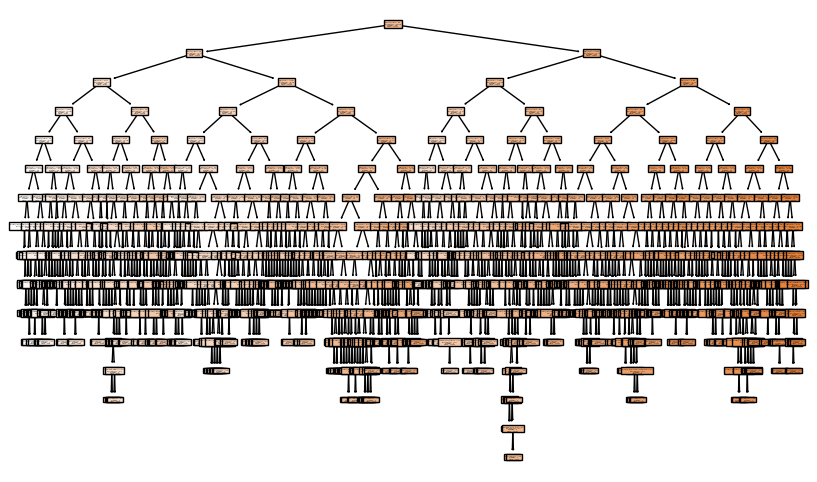

In [23]:
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns.tolist(), filled = True)
plt.show()

In [24]:
max_features = np.sqrt(len(x_train.columns))
print(max_features)
print(arbol.tree_.max_depth)

4.898979485566356
15


In [25]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [26]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    """esta función nos devuelve un df con las métricas de un Decission Tree.

    Args:
        y_test (serie): datos con los que se testea el Decission Tree.
        y_train (serie): datos con los que aprende el Decission Tree.
        y_test_pred (array): valores predichos de testeo.
        y_train_pred (array): valores predichos de entrenamiento.
        tipo_modelo (string): nombre que le quieres dar al Decission Tree

    Returns:
        df: return con las métricas del df.
    """
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [27]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.146116,0.048895,0.221123,0.997171,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


CONCLUSIÓN:

- Existe overfitting puesto que al sacar las métricas los valores de R2 son 

In [28]:
# Creamos un diccionario con los hiperparámetros que queremos modificar.
param = {"max_depth": [6, 8, 10, 12], # bajamos la profundidad del modelo para intentar compensar el overfitting
        "max_features": [5,6,7,8],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]}

In [29]:
gs = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid= param, 
        cv=10, 
        verbose= 0,
        return_train_score = True,
        scoring="neg_mean_squared_error") 

In [30]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=10, max_features=8, min_samples_leaf=10,
                      min_samples_split=10)

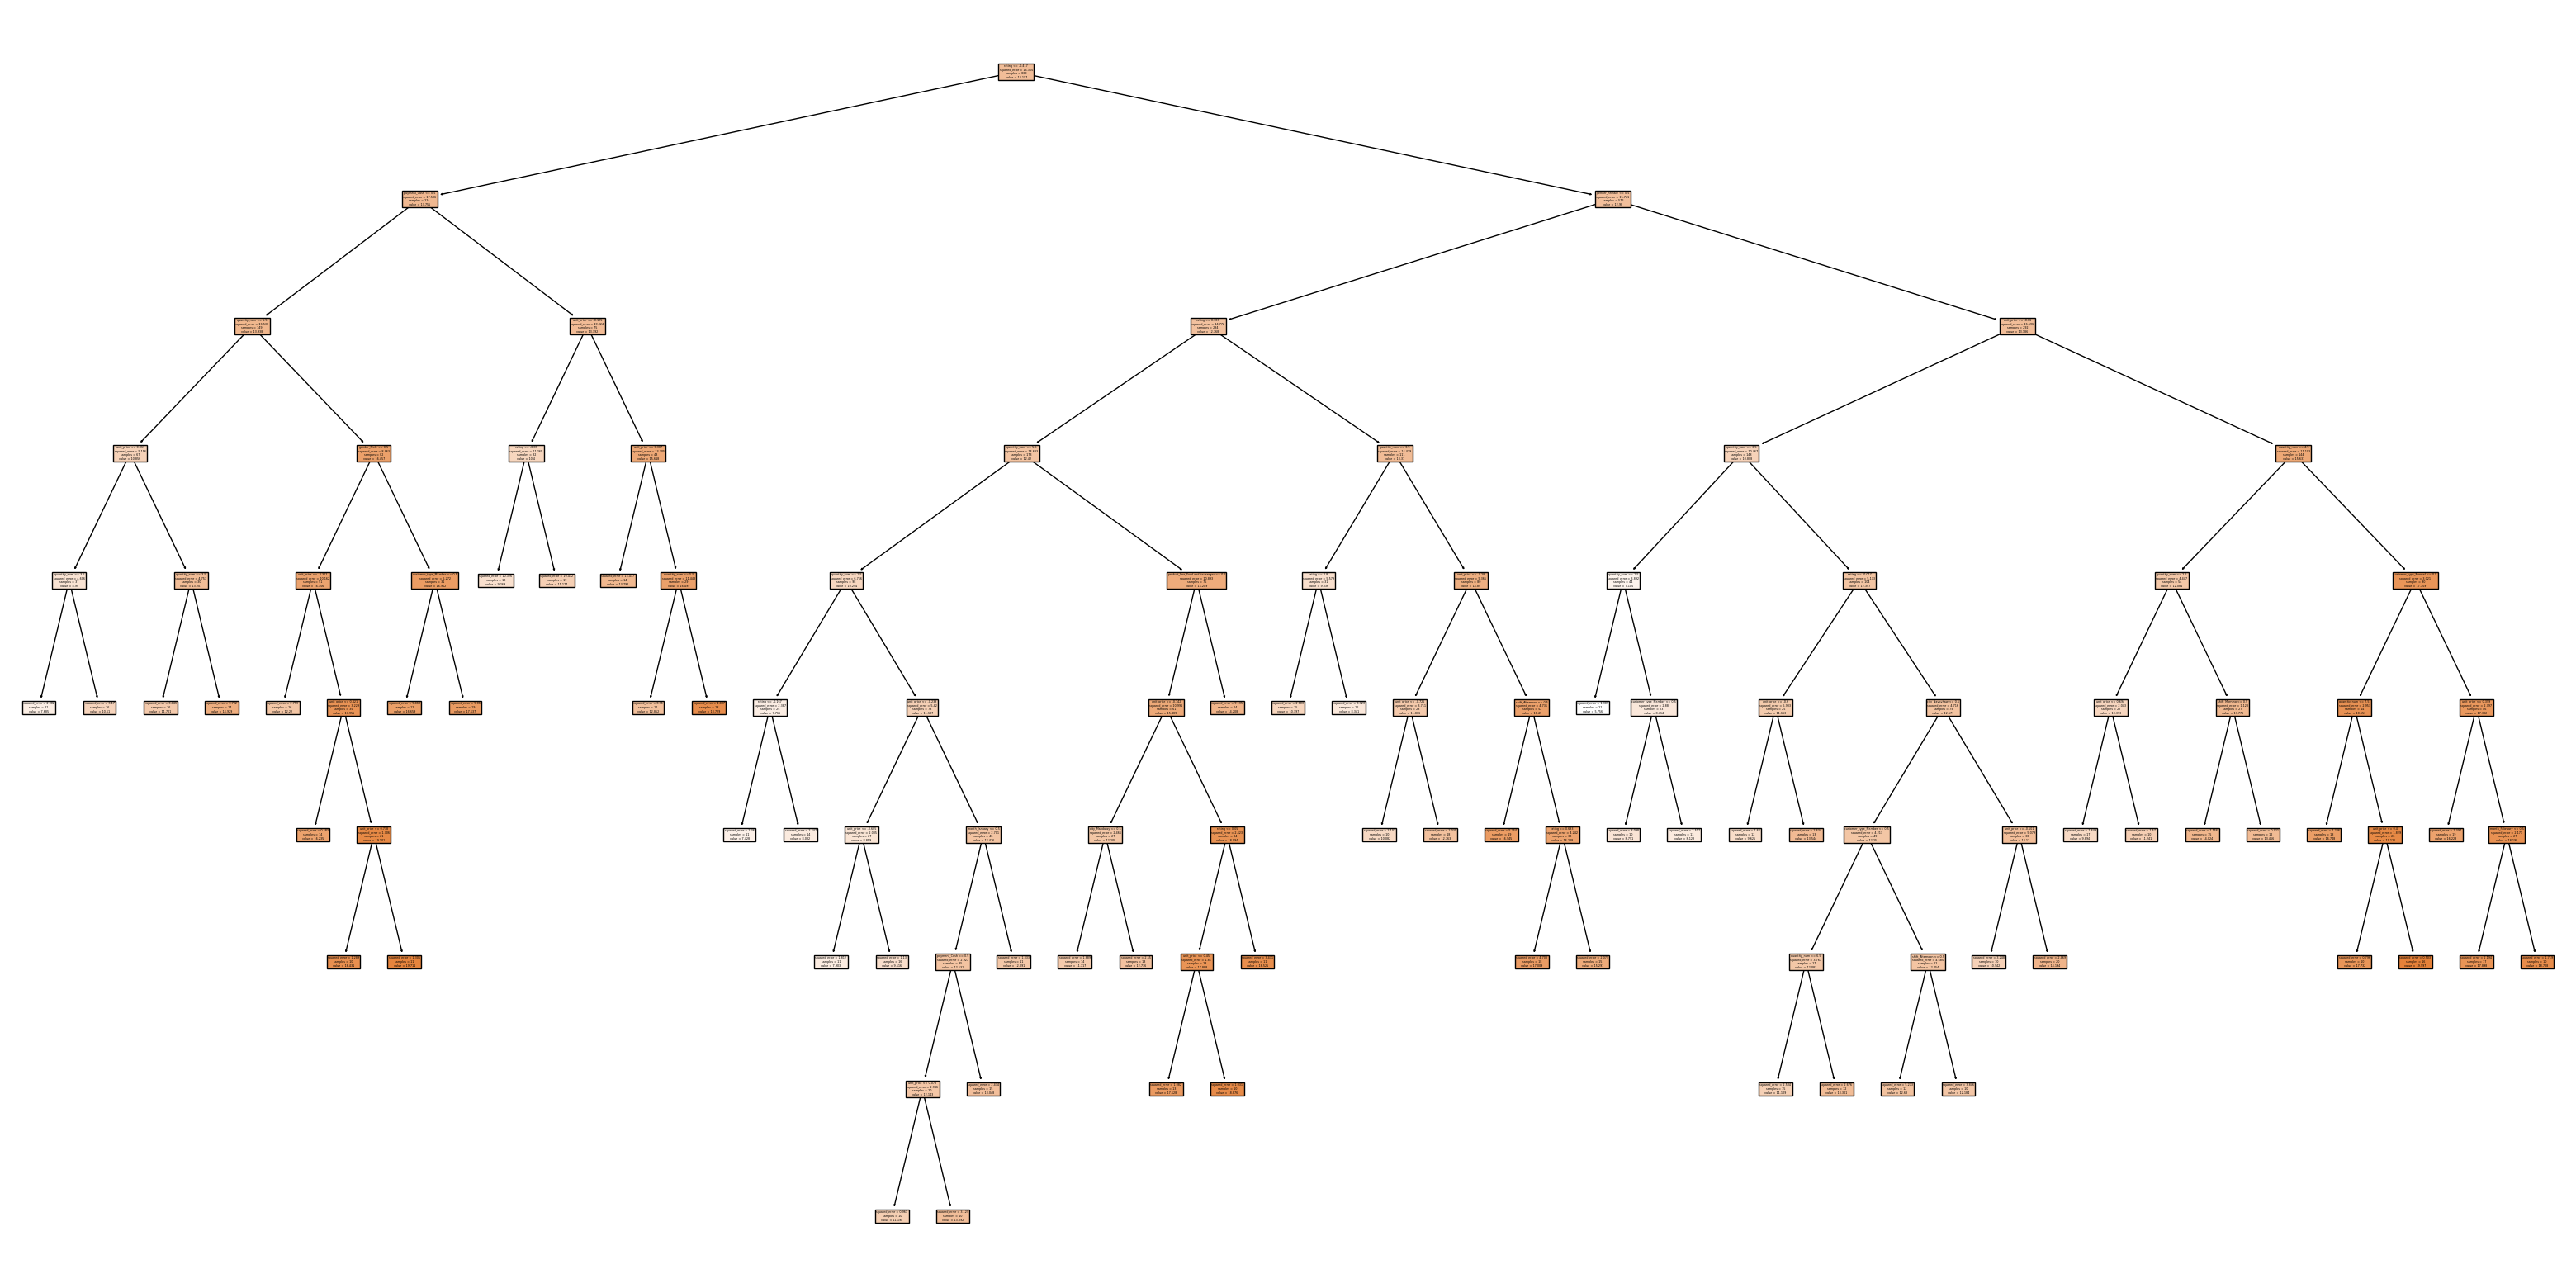

In [32]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns.tolist(), filled=True);

In [33]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,1.626711,4.388806,2.094948,0.746059,test,Decision tree II
1,1.361771,3.076762,1.754070,0.811988,train,Decision tree II


### RANDOM FOREST

In [35]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose= False, 
            return_train_score = True,
            scoring="neg_mean_squared_error") 

In [36]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=False)

In [37]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=10, max_features=8, min_samples_leaf=10,
                      min_samples_split=10)

In [38]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [39]:
dt_results_rf = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_results_rf

,MAE,MSE,RMSE,R2,set,modelo
0,0.935315,1.405161,1.185395,0.918696,test,Random Forest
1,0.754990,0.996953,0.998475,0.939079,train,Random Forest


In [40]:
df_todos_resultados = pd.concat([dt_results_rf, dt_results2], axis = 0)
df_todos_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.935315,1.405161,1.185395,0.918696,test,Random Forest
1,0.754990,0.996953,0.998475,0.939079,train,Random Forest
0,1.626711,4.388806,2.094948,0.746059,test,Decision tree II
1,1.361771,3.076762,1.754070,0.811988,train,Decision tree II


CONCLUSIONES:

- Ambos modelos tienen buenas métricas, pero el que mejor resultado da es el Random Forest, ya que tenemos valores más bajos en las métricas MAE, MSE, y RMSE, y más altos en R2.